## Implementation Of Hierarchical Clustering Using Python

Unsupervised Machine Learning uses Machine Learning algorithms to analyze and cluster unlabeled datasets. The most efficient algorithms of Unsupervised Learning are clustering and association rules. Hierarchical clustering is one of the clustering algorithms used to find a relation and hidden pattern from the unlabeled dataset.

## What Is Hierarchical Clustering?

Hierarchical clustering is another Unsupervised Machine Learning algorithm used to group the unlabeled datasets into a cluster. It develops the hierarchy of clusters in the form of a tree-shaped structure known as a dendrogram. A dendrogram is a tree diagram showing hierarchical relationships between different datasets.

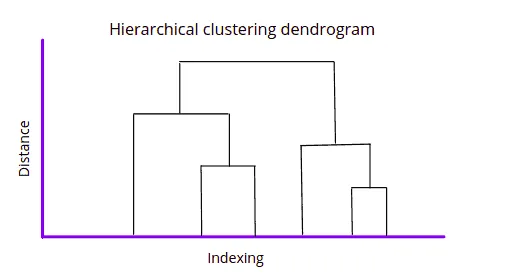

Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work.

***Hierarchical clustering uses two different approaches to create clusters:***

1. Agglomerative is a bottom-up approach in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

2. Divisive is the reverse to the agglomerative algorithm that uses a top-bottom approach (it takes all data points of a single cluster and divides them until every data point becomes a new cluster).

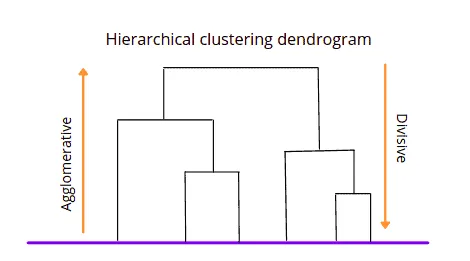

***One of the most significant advantages of Hierarchical over K-mean clustering is the algorithm doesn’t need to know the predefined number of clusters. We can assign the number of clusters depending on the dendrogram structure.***

## How Hierarchical Clustering Algorithm Works?

Let’s focus on the Agglomerative method to describe how the Hierarchical clustering algorithm works. This method starts joining data points of the dataset that are the closest to each other and repeats until it merges all of the data points into a single cluster containing the entire dataset.

For example, let’s take six data points as our dataset and look at the Agglomerative Hierarchical clustering algorithm steps.

The very first step of the algorithm is to take every data point as a separate cluster. If there are N data points, the number of clusters will be N.

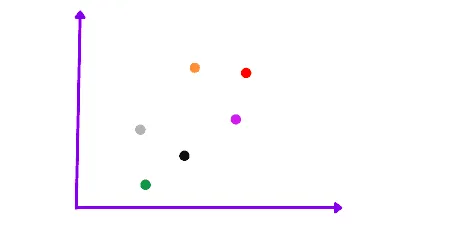

The next step of this algorithm is to take the two closest data points or clusters and merge them to form a bigger cluster. The total number of clusters becomes N-1.

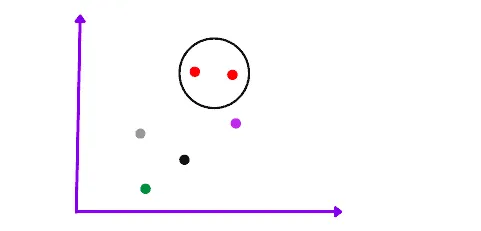

Subsequent algorithm iterations will continue merging the nearest two clusters until only one cluster is left.

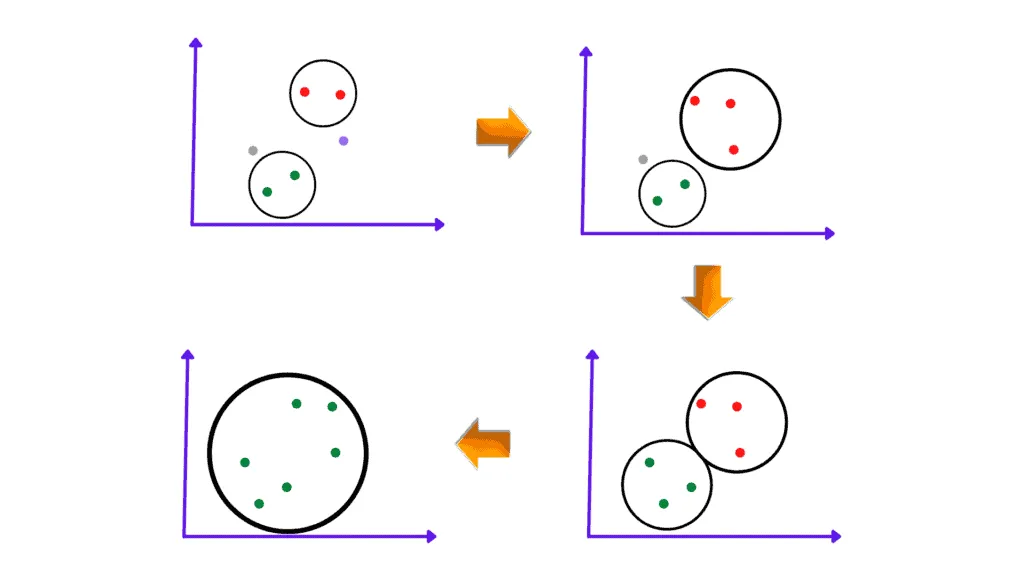

Once the algorithm combines all the data points into a single cluster, it can build the dendrogram describing the clusters’ hierarchy.

## Measuring Distance Bewteen Two Clusters

The distance between clusters or data points is crucial for Hierarchical clustering. Several Linkage methods can calculate this distance:

***Single linkage*** is the shortest distance between the closest points of the clusters calculated by any distance finding method (the most popular is the Euclidean distance).

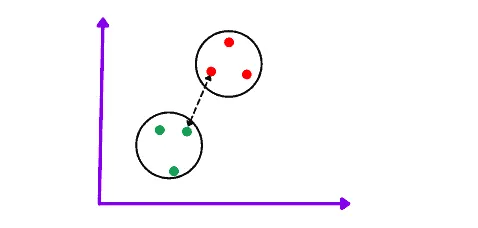

***Complete linkage*** is the longest distance between the two points of two different clusters. This linkage method allows you to create tighter clusters than a single linkage approach.

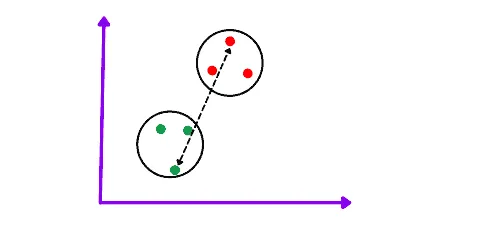

***Centroid Linkage*** is the distance between the centroid of two clusters

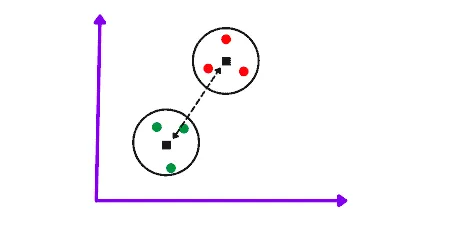

## Dendrogram In Hierarchical Clustering

The dendrogram is a tree-like structure that stores each step of the Hierarchical algorithm execution process. In the Dendrogram plot, the x-axis shows all data points, and the y-axis shows the distance between them. The below dendrogram describes the formation of clusters.

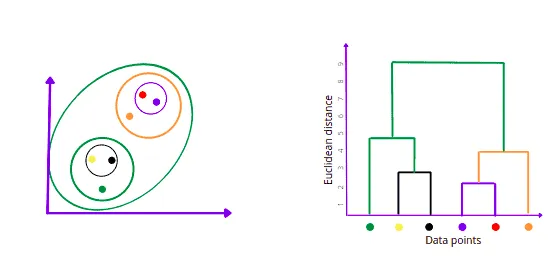

Once we have the dendrogram for the clusters, we can set a threshold (a red horizontal dashed line) to visually see the number of output classes from the dataset after algorithm execution.

Threshold is minimum distance required between the nearest clusters to treat them as a separate clusters. This is knowledge domain variable which you need to define yourself. If you don’t have enough information about your business domain, you can use the following methods to define the number of clusters in the dataset (take a look at the “7 methods for selecting the optimal number of clusters” article to find the implementation code).

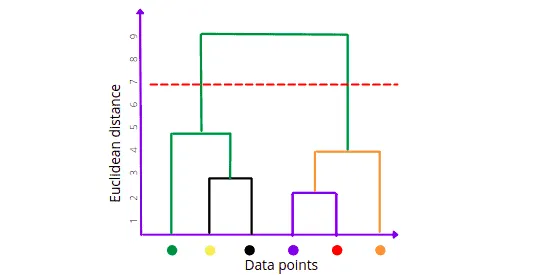

For example, for the threshold value of 7, the number of clusters will be 2. For the threshold value equal to 3, we’ll get 4 clusters, etc.

## Hierarchical Clustering Algorithm Implementation

### Exploring And Preparing Dataset

In [11]:
# importing the module
import pandas as pd
# importing the dataset
dataset = pd.read_csv('k-mean-dataset-mall-customer.csv')
# dataset 
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# checking for null values
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

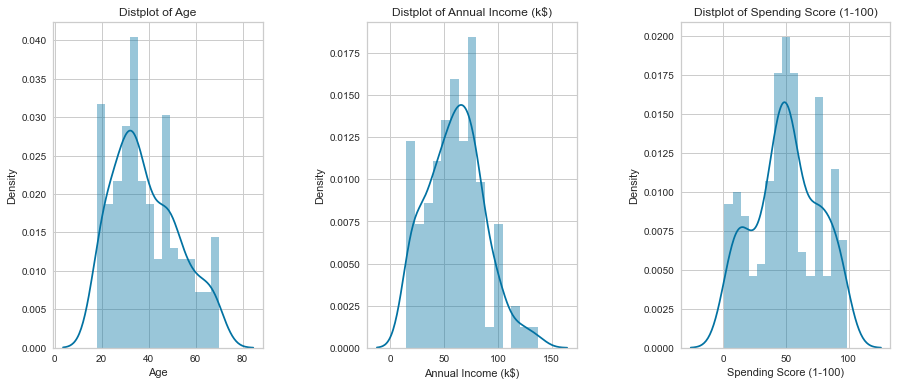

In [13]:
# importing the required modules
import matplotlib.pyplot as plt
import seaborn as sns
# graph size
plt.figure(1 , figsize = (15 , 6))
graph = 0 
# for loop
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    graph += 1
    
    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
# showing the graph
plt.show()

In [14]:
# importing preprocessing 
from sklearn import preprocessing 
# lable encoders
label_encoder = preprocessing.LabelEncoder() 
# converting gender to numeric values
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])
# head
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


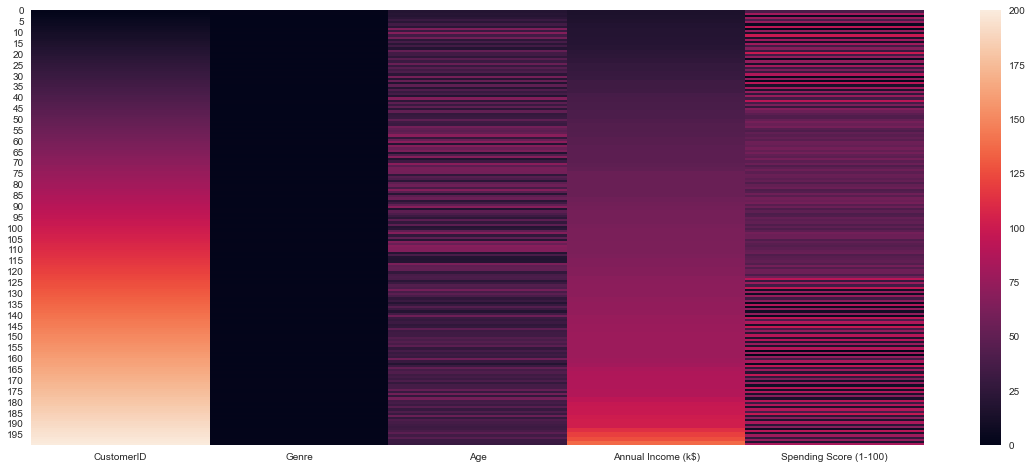

In [15]:
# graph size
plt.figure(1, figsize = (20 ,8))
# creating heatmap
sns.heatmap(dataset)
# showing graph
plt.show()

## Visvualizing Dendrogram

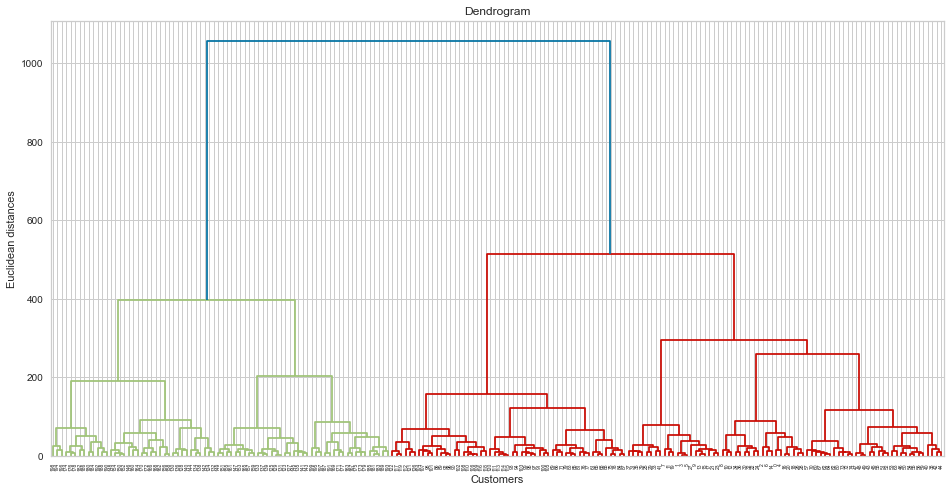

In [16]:
# importing the required module
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(1, figsize = (16 ,8))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(dataset, method  = "ward"))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Using Elbow Method For Estimating Number Of Clusters

The Elbow method allows you to estimate the meaningful amount of clusters we can get out of the dataset by iteratively applying a clustering algorithm to the dataset providing the different amount of clusters, and measuring the Sum of Squared Errors or inertia’s value decrease. Let’s use the Elbow method to our dataset to get the number of clusters estimation:

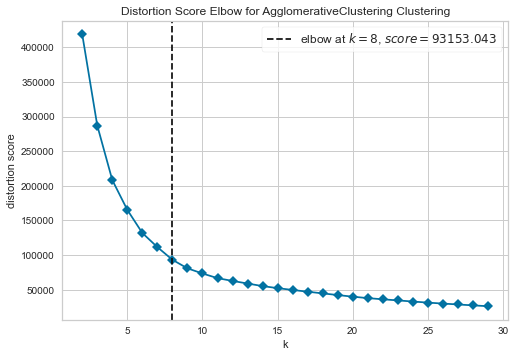

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(dataset)
# Finalize and render figure
visualizer.show()

C:\Users\Administrator.LAB-STUDENT\AppData\Local\Temp\ipykernel_15792\612336249.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


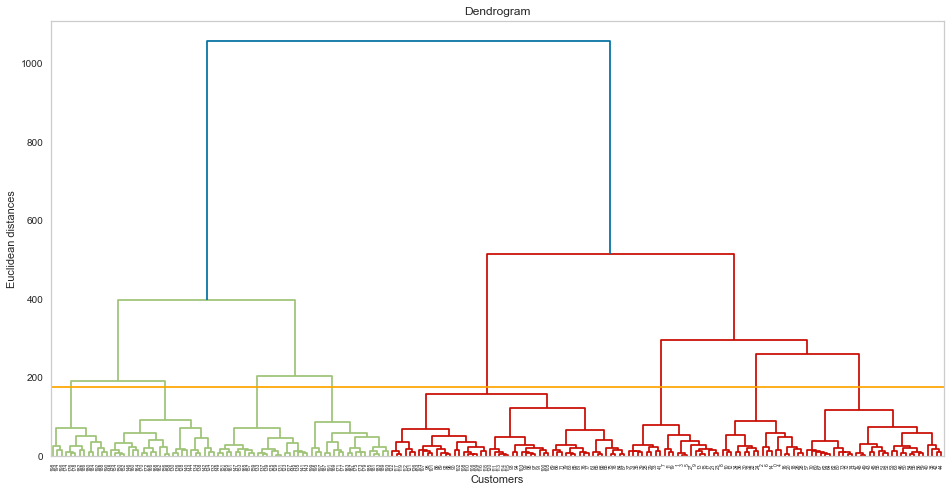

In [18]:
import scipy.cluster.hierarchy as sch
# size of image
plt.figure(1, figsize = (16 ,8))  
plt.grid(b=None)
# creating the dendrogram 
dend = sch.dendrogram(sch.linkage(dataset, method='ward'))
# theroshold
plt.axhline(y=175, color='orange')
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()